In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
data="StudentsPerformance.csv"
df=pd.read_csv(data) 

Load the dataset into a pandas dataframe and display the first 10 rows of the dataframe to gain familiarity with the data structure.


In [5]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# ** Perform exploratory data analysis**

In [4]:
# Check for missing values
missing_values = df.isnull()


In [6]:
df[missing_values]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
# Count missing values per column
missing_counts = df.isnull().sum()


In [8]:
missing_counts

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [9]:
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [20]:
Q1 = df.quantile(0.25, numeric_only=True)
Q3 = df.quantile(0.75, numeric_only=True)
df, Q1 = df.align(Q1, axis=1, copy=False)
df, Q3 = df.align(Q3, axis=1, copy=False)

threshold = 1.5  # Define the threshold as per your requirements

IQR = Q3 - Q1
outlier_mask = (df < Q1 - threshold * IQR) | (df > Q3 + threshold * IQR)


In [24]:
outlier_mask

,gender,lunch,math score,parental level of education,race/ethnicity,reading score,test preparation course,writing score
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False


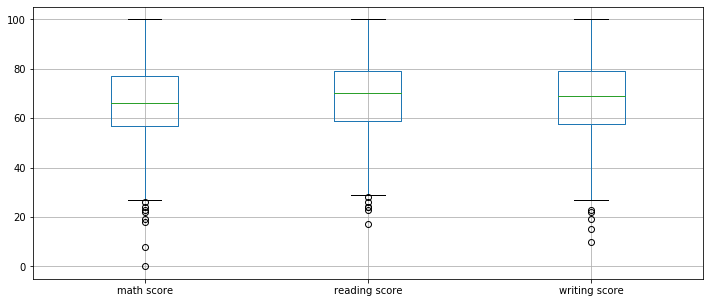

In [5]:
# Create box plots
df.boxplot(figsize=(12,5))


In [28]:
# Remove rows with outliers
df_no_outliers = df[~outlier_mask]


In [29]:
df_no_outliers

,gender,lunch,math score,parental level of education,race/ethnicity,reading score,test preparation course,writing score
0,female,standard,72.0,bachelor's degree,group B,72.0,none,74.0
1,female,standard,69.0,some college,group C,90.0,completed,88.0
2,female,standard,90.0,master's degree,group B,95.0,none,93.0
3,male,free/reduced,47.0,associate's degree,group A,57.0,none,44.0
4,male,standard,76.0,some college,group C,78.0,none,75.0
...,...,...,...,...,...,...,...,...
995,female,standard,88.0,master's degree,group E,99.0,completed,95.0
996,male,free/reduced,62.0,high school,group C,55.0,none,55.0
997,female,free/reduced,59.0,high school,group C,71.0,completed,65.0
998,female,standard,68.0,some college,group D,78.0,completed,77.0


In [32]:
df.sort_values(['math score','reading score','writing score'],ascending=False)

,gender,lunch,math score,parental level of education,race/ethnicity,reading score,test preparation course,writing score
458,female,standard,100,bachelor's degree,group E,100,none,100
916,male,standard,100,bachelor's degree,group E,100,completed,100
962,female,standard,100,associate's degree,group E,100,none,100
149,male,free/reduced,100,associate's degree,group E,100,completed,93
625,male,standard,100,some college,group D,97,completed,99
...,...,...,...,...,...,...,...,...
145,female,free/reduced,22,some college,group C,39,none,33
787,female,standard,19,some college,group B,38,none,32
17,female,free/reduced,18,some high school,group B,32,none,28
980,female,free/reduced,8,high school,group B,24,none,23


In [6]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [41]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

# **Perform data visualization**

In [9]:
import matplotlib.pyplot as plt

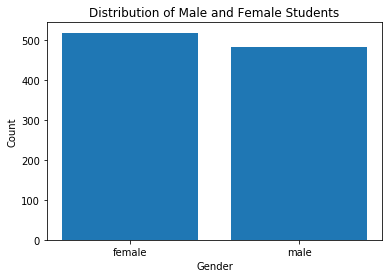

In [10]:
#Create a bar plot to show the distribution of male and female students in the dataset.

gender_counts = df['gender'].value_counts()

plt.bar(list(gender_counts.index), gender_counts.values)

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Male and Female Students')

plt.show()

In [45]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


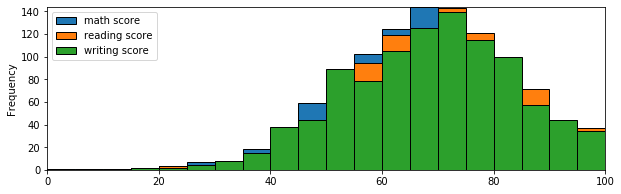

In [11]:
# Create a histogram to show the distribution of the scores in math, reading, and writing.

df[['math score','reading score','writing score']].plot.hist(bins=20,edgecolor='k',figsize=(10,3)).autoscale(enable=True,axis='both',tight=True)

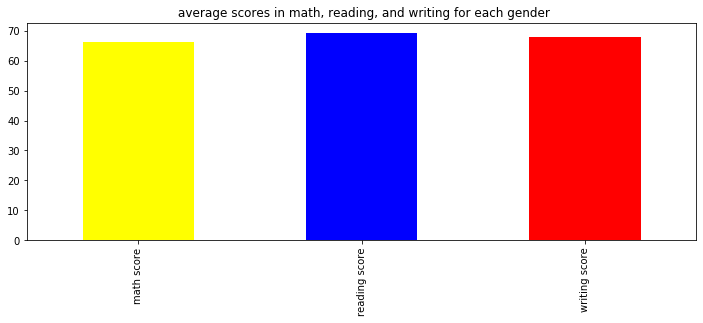

In [12]:
#Create a bar plot to show the average scores in math, reading, and writing for each gender.
title=" average scores in math, reading, and writing for each gender"
df[['math score','reading score','writing score']].mean().plot.bar(figsize=(12,4),title=title,color=['yellow', 'blue', 'red'])

<Axes: title={'center': 'Scores Relationship'}, xlabel='math score', ylabel='reading score'>

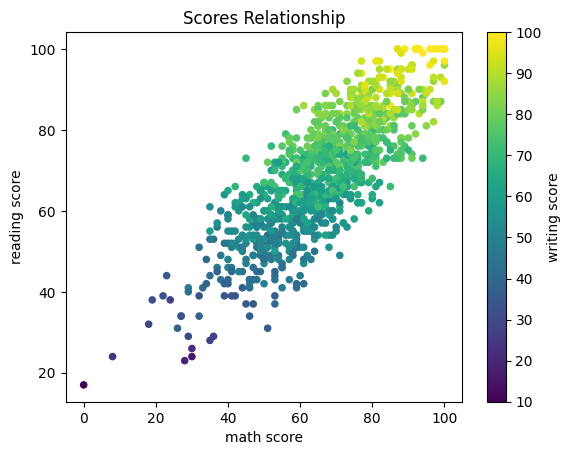

In [51]:
#Create a scatter plot to show the relationship between math, reading, and writing scores.
df.plot.scatter(x='math score',y='reading score',c='writing score',colormap='viridis', title='Scores Relationship')

## **Perform basic statistical analysis**

In [64]:
# Calculate mean, median, and mode for math, reading, and writing scores.

scores_columns = ['math score', 'reading score', 'writing score']

# Calculate the mean, median, and mode for each score
mean_scores = df[scores_columns].mean()
median_scores = df[scores_columns].median()
mode_scores = df[scores_columns].mode()

In [56]:
scores_columns

['math score', 'reading score', 'writing score']

In [67]:
mean_scores

math score       66.089
reading score    69.169
writing score    68.054
dtype: float64

In [66]:
median_scores

math score       66.0
reading score    70.0
writing score    69.0
dtype: float64

In [65]:
mode_scores

,math score,reading score,writing score
0,65,72,74


In [61]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Gender
0,female,group B,bachelor's degree,standard,none,72,72,74,"Axes(0.125,0.11;0.775x0.77)"
1,female,group C,some college,standard,completed,69,90,88,"Axes(0.125,0.11;0.775x0.77)"
2,female,group B,master's degree,standard,none,90,95,93,"Axes(0.125,0.11;0.775x0.77)"
3,male,group A,associate's degree,free/reduced,none,47,57,44,"Axes(0.125,0.11;0.775x0.77)"
4,male,group C,some college,standard,none,76,78,75,"Axes(0.125,0.11;0.775x0.77)"


In [62]:
#Calculate the standard deviation for math, reading, and writing scores.

std_scores = df[scores_columns].std()

In [68]:

std_scores

math score       15.163080
reading score    14.600192
writing score    15.195657
dtype: float64

In [69]:
'''Test if there's a significant difference between male and female students'
performance in math, reading, and writing using an appropriate statistical test (e.g., t-test).'''

import scipy.stats as stats
math_scores_male = df[df['gender'] == 'male']['math score']
math_scores_female = df[df['gender'] == 'female']['math score']
t_statistic_math, p_value_math = stats.ttest_ind(math_scores_male, math_scores_female)

reading_scores_male = df[df['gender'] == 'male']['reading score']
reading_scores_female = df[df['gender'] == 'female']['reading score']
t_statistic_reading, p_value_reading = stats.ttest_ind(reading_scores_male, reading_scores_female)

writing_scores_male = df[df['gender'] == 'male']['writing score']
writing_scores_female = df[df['gender'] == 'female']['writing score']
t_statistic_writing, p_value_writing = stats.ttest_ind(writing_scores_male, writing_scores_female)

In [70]:
print("Math Score - t-statistic:", t_statistic_math, "p-value:", p_value_math)
print("Reading Score - t-statistic:", t_statistic_reading, "p-value:", p_value_reading)
print("Writing Score - t-statistic:", t_statistic_writing, "p-value:", p_value_writing)

Math Score - t-statistic: 5.383245869828983 p-value: 9.120185549328822e-08
Reading Score - t-statistic: -7.959308005187657 p-value: 4.680538743933289e-15
Writing Score - t-statistic: -9.979557910004507 p-value: 2.019877706867934e-22
